In [1]:
from preprocessing_last20 import *
import torch.optim as optim
import torch.nn as nn
from tqdm import tqdm
# from mindiffusion.ddpm import DDPM
from mindiffusion.unet import NaiveUnet
from d2c_encoder import D2CEncoder
from d2c_decoder import D2CDecoder
device = torch.device('cuda:0')
train_data = train_data.to(device)
test_data = test_data.to(device)

In [2]:
# ddpm = DDPM(eps_model=NaiveUnet(16, 16, n_feat=128), betas=(1e-4, 0.02), n_T=200).to(device)
encoder = D2CEncoder().to(device)
decoder = D2CDecoder().to(device)
MSE = nn.MSELoss()

In [3]:
def train_1_ep_d2c(num_epoch, optim_e, optim_g):

    print(f"Epoch {num_epoch} : ")
    encoder.train()
    decoder.train()
    
    # batch of size 4
    train_data_tmp = train_data[torch.randperm(train_data.size()[0])]
    train_data_tmp = train_data_tmp.reshape(50, 4, 1, 64, 64)
    
    for i in tqdm(range(train_data_tmp.shape[0])):
        optim_e.zero_grad()
        optim_g.zero_grad()
        z = encoder(train_data_tmp[i])
        loss = MSE(train_data_tmp[i], decoder(z))
        loss.backward()

        optim_e.step()
        optim_g.step()
    print('loss: ',loss.item())

#     # save model
#     torch.save(ddpm.state_dict(), f"./d2c_ddpm.pth")
#     torch.save(encoder.state_dict(), f"./d2c_encoder.pth")
#     torch.save(decoder.state_dict(), f"./d2c_decoder.pth")

In [4]:
def test_d2c(encoder, decoder, i):  
#     gan_input = torch.normal(0, 1, size=(1,1,64, 64)) # noise
    encoder.eval()
    decoder.eval()
    tensor_to_picture(decoder(encoder(test_data[i])).detach().cpu().numpy()[0][0])

In [5]:
def train_d2c(epoch, lr, lr_decay, reg):
    for i in range(epoch):
        
        optim_e = torch.optim.SGD(encoder.parameters(), lr=lr*lr_decay**i, momentum=0.9, weight_decay=reg)
        optim_g = torch.optim.SGD(decoder.parameters(), lr=lr*lr_decay**i, momentum=0.9, weight_decay=reg)
        train_1_ep_d2c(i, optim_e, optim_g)

In [6]:
train_d2c(100, 0.001, 1, 0.00001)

Epoch 0 : 


100%|██████████| 50/50 [00:00<00:00, 187.96it/s]


loss:  0.9363914728164673
Epoch 1 : 


100%|██████████| 50/50 [00:00<00:00, 190.24it/s]


loss:  0.42239516973495483
Epoch 2 : 


100%|██████████| 50/50 [00:00<00:00, 139.81it/s]


loss:  0.24176952242851257
Epoch 3 : 


100%|██████████| 50/50 [00:00<00:00, 148.42it/s]


loss:  0.27215346693992615
Epoch 4 : 


100%|██████████| 50/50 [00:00<00:00, 196.46it/s]


loss:  0.2620665729045868
Epoch 5 : 


100%|██████████| 50/50 [00:00<00:00, 247.38it/s]


loss:  0.3412399888038635
Epoch 6 : 


100%|██████████| 50/50 [00:00<00:00, 148.56it/s]


loss:  0.19241061806678772
Epoch 7 : 


100%|██████████| 50/50 [00:00<00:00, 212.14it/s]


loss:  0.26393407583236694
Epoch 8 : 


100%|██████████| 50/50 [00:00<00:00, 131.23it/s]


loss:  0.20855024456977844
Epoch 9 : 


100%|██████████| 50/50 [00:00<00:00, 255.90it/s]


loss:  0.29353708028793335
Epoch 10 : 


100%|██████████| 50/50 [00:00<00:00, 309.05it/s]


loss:  0.2741243541240692
Epoch 11 : 


100%|██████████| 50/50 [00:00<00:00, 148.23it/s]


loss:  0.15663208067417145
Epoch 12 : 


100%|██████████| 50/50 [00:00<00:00, 189.59it/s]


loss:  0.21433475613594055
Epoch 13 : 


100%|██████████| 50/50 [00:00<00:00, 147.49it/s]


loss:  0.2915976643562317
Epoch 14 : 


100%|██████████| 50/50 [00:00<00:00, 225.36it/s]


loss:  0.15550503134727478
Epoch 15 : 


100%|██████████| 50/50 [00:00<00:00, 222.47it/s]


loss:  0.25287866592407227
Epoch 16 : 


100%|██████████| 50/50 [00:00<00:00, 196.25it/s]


loss:  0.1660861074924469
Epoch 17 : 


100%|██████████| 50/50 [00:00<00:00, 231.73it/s]


loss:  0.19578123092651367
Epoch 18 : 


100%|██████████| 50/50 [00:00<00:00, 250.19it/s]


loss:  0.17209073901176453
Epoch 19 : 


100%|██████████| 50/50 [00:00<00:00, 263.91it/s]


loss:  0.20491909980773926
Epoch 20 : 


100%|██████████| 50/50 [00:00<00:00, 215.62it/s]


loss:  0.1596379578113556
Epoch 21 : 


100%|██████████| 50/50 [00:00<00:00, 270.41it/s]


loss:  0.16454720497131348
Epoch 22 : 


100%|██████████| 50/50 [00:00<00:00, 213.67it/s]


loss:  0.22737935185432434
Epoch 23 : 


100%|██████████| 50/50 [00:00<00:00, 196.01it/s]


loss:  0.144145667552948
Epoch 24 : 


100%|██████████| 50/50 [00:00<00:00, 156.63it/s]


loss:  0.11853864789009094
Epoch 25 : 


100%|██████████| 50/50 [00:00<00:00, 140.70it/s]


loss:  0.16302785277366638
Epoch 26 : 


100%|██████████| 50/50 [00:00<00:00, 182.69it/s]


loss:  0.19645264744758606
Epoch 27 : 


100%|██████████| 50/50 [00:00<00:00, 179.75it/s]


loss:  0.1233346164226532
Epoch 28 : 


100%|██████████| 50/50 [00:00<00:00, 163.71it/s]


loss:  0.20747384428977966
Epoch 29 : 


100%|██████████| 50/50 [00:00<00:00, 209.64it/s]


loss:  0.1707926243543625
Epoch 30 : 


100%|██████████| 50/50 [00:00<00:00, 160.08it/s]


loss:  0.2290845513343811
Epoch 31 : 


100%|██████████| 50/50 [00:00<00:00, 193.64it/s]


loss:  0.14523886144161224
Epoch 32 : 


100%|██████████| 50/50 [00:00<00:00, 196.69it/s]


loss:  0.15630954504013062
Epoch 33 : 


100%|██████████| 50/50 [00:00<00:00, 265.55it/s]


loss:  0.1306399405002594
Epoch 34 : 


100%|██████████| 50/50 [00:00<00:00, 228.54it/s]


loss:  0.201946422457695
Epoch 35 : 


100%|██████████| 50/50 [00:00<00:00, 165.24it/s]


loss:  0.17428423464298248
Epoch 36 : 


100%|██████████| 50/50 [00:00<00:00, 165.22it/s]


loss:  0.18246619403362274
Epoch 37 : 


100%|██████████| 50/50 [00:00<00:00, 191.32it/s]


loss:  0.1726343035697937
Epoch 38 : 


100%|██████████| 50/50 [00:00<00:00, 223.89it/s]


loss:  0.14985500276088715
Epoch 39 : 


100%|██████████| 50/50 [00:00<00:00, 255.88it/s]


loss:  0.25313055515289307
Epoch 40 : 


100%|██████████| 50/50 [00:00<00:00, 228.40it/s]


loss:  0.2377343773841858
Epoch 41 : 


100%|██████████| 50/50 [00:00<00:00, 187.99it/s]


loss:  0.15369409322738647
Epoch 42 : 


100%|██████████| 50/50 [00:00<00:00, 218.81it/s]


loss:  0.15049336850643158
Epoch 43 : 


100%|██████████| 50/50 [00:00<00:00, 145.62it/s]


loss:  0.19010499119758606
Epoch 44 : 


100%|██████████| 50/50 [00:00<00:00, 210.56it/s]


loss:  0.15288308262825012
Epoch 45 : 


100%|██████████| 50/50 [00:00<00:00, 185.50it/s]


loss:  0.14791442453861237
Epoch 46 : 


100%|██████████| 50/50 [00:00<00:00, 175.81it/s]


loss:  0.17917858064174652
Epoch 47 : 


100%|██████████| 50/50 [00:00<00:00, 178.61it/s]


loss:  0.2350189983844757
Epoch 48 : 


100%|██████████| 50/50 [00:00<00:00, 183.01it/s]


loss:  0.21242918074131012
Epoch 49 : 


100%|██████████| 50/50 [00:00<00:00, 151.51it/s]


loss:  0.1342451572418213
Epoch 50 : 


100%|██████████| 50/50 [00:00<00:00, 189.53it/s]


loss:  0.18265268206596375
Epoch 51 : 


100%|██████████| 50/50 [00:00<00:00, 153.29it/s]


loss:  0.17229437828063965
Epoch 52 : 


100%|██████████| 50/50 [00:00<00:00, 158.70it/s]


loss:  0.1495196372270584
Epoch 53 : 


100%|██████████| 50/50 [00:00<00:00, 154.19it/s]


loss:  0.11551612615585327
Epoch 54 : 


100%|██████████| 50/50 [00:00<00:00, 197.09it/s]


loss:  0.18632622063159943
Epoch 55 : 


100%|██████████| 50/50 [00:00<00:00, 215.79it/s]


loss:  0.184883713722229
Epoch 56 : 


100%|██████████| 50/50 [00:00<00:00, 172.87it/s]


loss:  0.20318129658699036
Epoch 57 : 


100%|██████████| 50/50 [00:00<00:00, 193.79it/s]


loss:  0.1079072579741478
Epoch 58 : 


100%|██████████| 50/50 [00:00<00:00, 208.08it/s]


loss:  0.12292185425758362
Epoch 59 : 


100%|██████████| 50/50 [00:00<00:00, 213.15it/s]


loss:  0.12969478964805603
Epoch 60 : 


100%|██████████| 50/50 [00:00<00:00, 274.15it/s]


loss:  0.1843886375427246
Epoch 61 : 


100%|██████████| 50/50 [00:00<00:00, 152.34it/s]


loss:  0.20150062441825867
Epoch 62 : 


100%|██████████| 50/50 [00:00<00:00, 181.85it/s]


loss:  0.1197907030582428
Epoch 63 : 


100%|██████████| 50/50 [00:00<00:00, 155.71it/s]


loss:  0.17438775300979614
Epoch 64 : 


100%|██████████| 50/50 [00:00<00:00, 202.11it/s]


loss:  0.16876494884490967
Epoch 65 : 


100%|██████████| 50/50 [00:00<00:00, 236.52it/s]


loss:  0.2246829867362976
Epoch 66 : 


100%|██████████| 50/50 [00:00<00:00, 162.59it/s]


loss:  0.15633834898471832
Epoch 67 : 


100%|██████████| 50/50 [00:00<00:00, 186.21it/s]


loss:  0.1457415670156479
Epoch 68 : 


100%|██████████| 50/50 [00:00<00:00, 173.20it/s]


loss:  0.1264641284942627
Epoch 69 : 


100%|██████████| 50/50 [00:00<00:00, 202.09it/s]


loss:  0.1456850916147232
Epoch 70 : 


100%|██████████| 50/50 [00:00<00:00, 190.95it/s]


loss:  0.19135859608650208
Epoch 71 : 


100%|██████████| 50/50 [00:00<00:00, 195.93it/s]


loss:  0.1380128413438797
Epoch 72 : 


100%|██████████| 50/50 [00:00<00:00, 177.30it/s]


loss:  0.1990300416946411
Epoch 73 : 


100%|██████████| 50/50 [00:00<00:00, 235.42it/s]


loss:  0.16262708604335785
Epoch 74 : 


100%|██████████| 50/50 [00:00<00:00, 232.68it/s]


loss:  0.15675470232963562
Epoch 75 : 


100%|██████████| 50/50 [00:00<00:00, 209.60it/s]


loss:  0.10870290547609329
Epoch 76 : 


100%|██████████| 50/50 [00:00<00:00, 213.71it/s]


loss:  0.19630485773086548
Epoch 77 : 


100%|██████████| 50/50 [00:00<00:00, 276.38it/s]


loss:  0.1392316222190857
Epoch 78 : 


100%|██████████| 50/50 [00:00<00:00, 207.83it/s]


loss:  0.14176273345947266
Epoch 79 : 


100%|██████████| 50/50 [00:00<00:00, 157.35it/s]


loss:  0.12160524725914001
Epoch 80 : 


100%|██████████| 50/50 [00:00<00:00, 179.92it/s]


loss:  0.13891729712486267
Epoch 81 : 


100%|██████████| 50/50 [00:00<00:00, 157.78it/s]


loss:  0.20741985738277435
Epoch 82 : 


100%|██████████| 50/50 [00:00<00:00, 152.39it/s]


loss:  0.13135573267936707
Epoch 83 : 


100%|██████████| 50/50 [00:00<00:00, 203.78it/s]


loss:  0.11722208559513092
Epoch 84 : 


100%|██████████| 50/50 [00:00<00:00, 165.04it/s]


loss:  0.2345842570066452
Epoch 85 : 


100%|██████████| 50/50 [00:00<00:00, 156.49it/s]


loss:  0.20682033896446228
Epoch 86 : 


100%|██████████| 50/50 [00:00<00:00, 162.10it/s]


loss:  0.14188820123672485
Epoch 87 : 


100%|██████████| 50/50 [00:00<00:00, 218.99it/s]


loss:  0.1333552598953247
Epoch 88 : 


100%|██████████| 50/50 [00:00<00:00, 180.04it/s]


loss:  0.09465141594409943
Epoch 89 : 


100%|██████████| 50/50 [00:00<00:00, 231.28it/s]


loss:  0.11418555676937103
Epoch 90 : 


100%|██████████| 50/50 [00:00<00:00, 165.31it/s]


loss:  0.18053439259529114
Epoch 91 : 


100%|██████████| 50/50 [00:00<00:00, 176.57it/s]


loss:  0.13745197653770447
Epoch 92 : 


100%|██████████| 50/50 [00:00<00:00, 174.77it/s]


loss:  0.1648898422718048
Epoch 93 : 


100%|██████████| 50/50 [00:00<00:00, 152.13it/s]


loss:  0.16077762842178345
Epoch 94 : 


100%|██████████| 50/50 [00:00<00:00, 179.96it/s]


loss:  0.15361183881759644
Epoch 95 : 


100%|██████████| 50/50 [00:00<00:00, 152.33it/s]


loss:  0.13534754514694214
Epoch 96 : 


100%|██████████| 50/50 [00:00<00:00, 179.68it/s]


loss:  0.1221807450056076
Epoch 97 : 


100%|██████████| 50/50 [00:00<00:00, 168.92it/s]


loss:  0.1628410816192627
Epoch 98 : 


100%|██████████| 50/50 [00:00<00:00, 165.16it/s]


loss:  0.15554937720298767
Epoch 99 : 


100%|██████████| 50/50 [00:00<00:00, 186.81it/s]

loss:  0.16475316882133484


In [7]:
train_d2c(100, 0.001, 1, 0.0000)

Epoch 0 : 


100%|██████████| 50/50 [00:00<00:00, 184.80it/s]


loss:  0.1028088629245758
Epoch 1 : 


100%|██████████| 50/50 [00:00<00:00, 225.08it/s]


loss:  0.16736261546611786
Epoch 2 : 


100%|██████████| 50/50 [00:00<00:00, 205.47it/s]


loss:  0.11673189699649811
Epoch 3 : 


100%|██████████| 50/50 [00:00<00:00, 205.39it/s]


loss:  0.17900973558425903
Epoch 4 : 


100%|██████████| 50/50 [00:00<00:00, 184.21it/s]


loss:  0.1140223890542984
Epoch 5 : 


100%|██████████| 50/50 [00:00<00:00, 160.49it/s]


loss:  0.20807886123657227
Epoch 6 : 


100%|██████████| 50/50 [00:00<00:00, 243.25it/s]


loss:  0.13400226831436157
Epoch 7 : 


100%|██████████| 50/50 [00:00<00:00, 255.67it/s]


loss:  0.14920750260353088
Epoch 8 : 


100%|██████████| 50/50 [00:00<00:00, 179.72it/s]


loss:  0.14747139811515808
Epoch 9 : 


100%|██████████| 50/50 [00:00<00:00, 215.57it/s]


loss:  0.12106069177389145
Epoch 10 : 


100%|██████████| 50/50 [00:00<00:00, 256.41it/s]


loss:  0.17740094661712646
Epoch 11 : 


100%|██████████| 50/50 [00:00<00:00, 222.20it/s]


loss:  0.11305379867553711
Epoch 12 : 


100%|██████████| 50/50 [00:00<00:00, 181.02it/s]


loss:  0.15334656834602356
Epoch 13 : 


100%|██████████| 50/50 [00:00<00:00, 217.19it/s]


loss:  0.19052401185035706
Epoch 14 : 


100%|██████████| 50/50 [00:00<00:00, 203.87it/s]


loss:  0.09792977571487427
Epoch 15 : 


100%|██████████| 50/50 [00:00<00:00, 167.48it/s]


loss:  0.14467266201972961
Epoch 16 : 


100%|██████████| 50/50 [00:00<00:00, 218.82it/s]


loss:  0.2514662742614746
Epoch 17 : 


100%|██████████| 50/50 [00:00<00:00, 191.18it/s]


loss:  0.14737406373023987
Epoch 18 : 


100%|██████████| 50/50 [00:00<00:00, 219.92it/s]


loss:  0.15803328156471252
Epoch 19 : 


100%|██████████| 50/50 [00:00<00:00, 213.14it/s]


loss:  0.14108577370643616
Epoch 20 : 


100%|██████████| 50/50 [00:00<00:00, 161.89it/s]


loss:  0.15083065629005432
Epoch 21 : 


100%|██████████| 50/50 [00:00<00:00, 187.45it/s]


loss:  0.1471601277589798
Epoch 22 : 


100%|██████████| 50/50 [00:00<00:00, 186.42it/s]


loss:  0.16278484463691711
Epoch 23 : 


100%|██████████| 50/50 [00:00<00:00, 160.02it/s]


loss:  0.15522721409797668
Epoch 24 : 


100%|██████████| 50/50 [00:00<00:00, 175.73it/s]


loss:  0.11794666945934296
Epoch 25 : 


100%|██████████| 50/50 [00:00<00:00, 148.68it/s]


loss:  0.17008966207504272
Epoch 26 : 


100%|██████████| 50/50 [00:00<00:00, 204.21it/s]


loss:  0.19407543540000916
Epoch 27 : 


100%|██████████| 50/50 [00:00<00:00, 163.92it/s]


loss:  0.1728149652481079
Epoch 28 : 


100%|██████████| 50/50 [00:00<00:00, 197.23it/s]


loss:  0.1152556762099266
Epoch 29 : 


100%|██████████| 50/50 [00:00<00:00, 226.97it/s]


loss:  0.14845964312553406
Epoch 30 : 


100%|██████████| 50/50 [00:00<00:00, 215.77it/s]


loss:  0.15747758746147156
Epoch 31 : 


100%|██████████| 50/50 [00:00<00:00, 221.28it/s]


loss:  0.1690015345811844
Epoch 32 : 


100%|██████████| 50/50 [00:00<00:00, 222.81it/s]


loss:  0.11422869563102722
Epoch 33 : 


100%|██████████| 50/50 [00:00<00:00, 189.17it/s]


loss:  0.13908874988555908
Epoch 34 : 


100%|██████████| 50/50 [00:00<00:00, 220.77it/s]


loss:  0.1139480322599411
Epoch 35 : 


100%|██████████| 50/50 [00:00<00:00, 176.61it/s]


loss:  0.19484984874725342
Epoch 36 : 


100%|██████████| 50/50 [00:00<00:00, 279.94it/s]


loss:  0.19026996195316315
Epoch 37 : 


100%|██████████| 50/50 [00:00<00:00, 189.95it/s]


loss:  0.13073986768722534
Epoch 38 : 


100%|██████████| 50/50 [00:00<00:00, 192.89it/s]


loss:  0.1302514672279358
Epoch 39 : 


100%|██████████| 50/50 [00:00<00:00, 214.78it/s]


loss:  0.1330132782459259
Epoch 40 : 


100%|██████████| 50/50 [00:00<00:00, 243.63it/s]


loss:  0.14535516500473022
Epoch 41 : 


100%|██████████| 50/50 [00:00<00:00, 191.27it/s]


loss:  0.1470315307378769
Epoch 42 : 


100%|██████████| 50/50 [00:00<00:00, 214.85it/s]


loss:  0.15101319551467896
Epoch 43 : 


100%|██████████| 50/50 [00:00<00:00, 253.48it/s]


loss:  0.1350964605808258
Epoch 44 : 


100%|██████████| 50/50 [00:00<00:00, 233.02it/s]


loss:  0.16949637234210968
Epoch 45 : 


100%|██████████| 50/50 [00:00<00:00, 250.69it/s]


loss:  0.14116694033145905
Epoch 46 : 


100%|██████████| 50/50 [00:00<00:00, 205.86it/s]


loss:  0.11771932244300842
Epoch 47 : 


100%|██████████| 50/50 [00:00<00:00, 186.92it/s]


loss:  0.15571211278438568
Epoch 48 : 


100%|██████████| 50/50 [00:00<00:00, 155.69it/s]


loss:  0.13169828057289124
Epoch 49 : 


100%|██████████| 50/50 [00:00<00:00, 190.74it/s]


loss:  0.11639527976512909
Epoch 50 : 


100%|██████████| 50/50 [00:00<00:00, 197.52it/s]


loss:  0.13945338129997253
Epoch 51 : 


100%|██████████| 50/50 [00:00<00:00, 199.29it/s]


loss:  0.14179927110671997
Epoch 52 : 


100%|██████████| 50/50 [00:00<00:00, 238.54it/s]


loss:  0.17043019831180573
Epoch 53 : 


100%|██████████| 50/50 [00:00<00:00, 170.07it/s]


loss:  0.16094228625297546
Epoch 54 : 


100%|██████████| 50/50 [00:00<00:00, 193.80it/s]


loss:  0.09868127852678299
Epoch 55 : 


100%|██████████| 50/50 [00:00<00:00, 166.82it/s]


loss:  0.15732614696025848
Epoch 56 : 


100%|██████████| 50/50 [00:00<00:00, 183.47it/s]


loss:  0.11562047153711319
Epoch 57 : 


100%|██████████| 50/50 [00:00<00:00, 235.47it/s]


loss:  0.15564388036727905
Epoch 58 : 


100%|██████████| 50/50 [00:00<00:00, 210.50it/s]


loss:  0.17940281331539154
Epoch 59 : 


100%|██████████| 50/50 [00:00<00:00, 233.50it/s]


loss:  0.16445504128932953
Epoch 60 : 


100%|██████████| 50/50 [00:00<00:00, 240.39it/s]


loss:  0.2059350311756134
Epoch 61 : 


100%|██████████| 50/50 [00:00<00:00, 169.41it/s]


loss:  0.1295311450958252
Epoch 62 : 


100%|██████████| 50/50 [00:00<00:00, 220.94it/s]


loss:  0.13244827091693878
Epoch 63 : 


100%|██████████| 50/50 [00:00<00:00, 168.98it/s]


loss:  0.14223924279212952
Epoch 64 : 


100%|██████████| 50/50 [00:00<00:00, 211.43it/s]


loss:  0.20180761814117432
Epoch 65 : 


100%|██████████| 50/50 [00:00<00:00, 163.39it/s]


loss:  0.20569023489952087
Epoch 66 : 


100%|██████████| 50/50 [00:00<00:00, 219.67it/s]


loss:  0.116448774933815
Epoch 67 : 


100%|██████████| 50/50 [00:00<00:00, 215.63it/s]


loss:  0.14335031807422638
Epoch 68 : 


100%|██████████| 50/50 [00:00<00:00, 167.90it/s]


loss:  0.1609809547662735
Epoch 69 : 


100%|██████████| 50/50 [00:00<00:00, 219.37it/s]


loss:  0.11522037535905838
Epoch 70 : 


100%|██████████| 50/50 [00:00<00:00, 168.35it/s]


loss:  0.17306192219257355
Epoch 71 : 


100%|██████████| 50/50 [00:00<00:00, 237.13it/s]


loss:  0.1642625331878662
Epoch 72 : 


100%|██████████| 50/50 [00:00<00:00, 204.38it/s]


loss:  0.15998820960521698
Epoch 73 : 


100%|██████████| 50/50 [00:00<00:00, 215.62it/s]


loss:  0.19872330129146576
Epoch 74 : 


100%|██████████| 50/50 [00:00<00:00, 202.39it/s]


loss:  0.13902227580547333
Epoch 75 : 


100%|██████████| 50/50 [00:00<00:00, 229.54it/s]


loss:  0.13828973472118378
Epoch 76 : 


100%|██████████| 50/50 [00:00<00:00, 274.63it/s]


loss:  0.10256336629390717
Epoch 77 : 


100%|██████████| 50/50 [00:00<00:00, 267.73it/s]


loss:  0.13673555850982666
Epoch 78 : 


100%|██████████| 50/50 [00:00<00:00, 260.48it/s]


loss:  0.1535830944776535
Epoch 79 : 


100%|██████████| 50/50 [00:00<00:00, 246.10it/s]


loss:  0.14164862036705017
Epoch 80 : 


100%|██████████| 50/50 [00:00<00:00, 223.26it/s]


loss:  0.11750578880310059
Epoch 81 : 


100%|██████████| 50/50 [00:00<00:00, 251.82it/s]


loss:  0.13894566893577576
Epoch 82 : 


100%|██████████| 50/50 [00:00<00:00, 216.17it/s]


loss:  0.14680883288383484
Epoch 83 : 


100%|██████████| 50/50 [00:00<00:00, 252.59it/s]


loss:  0.12280279397964478
Epoch 84 : 


100%|██████████| 50/50 [00:00<00:00, 233.29it/s]


loss:  0.19725337624549866
Epoch 85 : 


100%|██████████| 50/50 [00:00<00:00, 238.96it/s]


loss:  0.16769453883171082
Epoch 86 : 


100%|██████████| 50/50 [00:00<00:00, 149.52it/s]


loss:  0.21069134771823883
Epoch 87 : 


100%|██████████| 50/50 [00:00<00:00, 185.44it/s]


loss:  0.18189433217048645
Epoch 88 : 


100%|██████████| 50/50 [00:00<00:00, 167.09it/s]


loss:  0.15007689595222473
Epoch 89 : 


100%|██████████| 50/50 [00:00<00:00, 237.11it/s]


loss:  0.12378726154565811
Epoch 90 : 


100%|██████████| 50/50 [00:00<00:00, 217.45it/s]


loss:  0.12303843349218369
Epoch 91 : 


100%|██████████| 50/50 [00:00<00:00, 155.31it/s]


loss:  0.14717379212379456
Epoch 92 : 


100%|██████████| 50/50 [00:00<00:00, 210.44it/s]


loss:  0.17653216421604156
Epoch 93 : 


100%|██████████| 50/50 [00:00<00:00, 168.10it/s]


loss:  0.12926240265369415
Epoch 94 : 


100%|██████████| 50/50 [00:00<00:00, 209.85it/s]


loss:  0.16525831818580627
Epoch 95 : 


100%|██████████| 50/50 [00:00<00:00, 215.29it/s]


loss:  0.16546520590782166
Epoch 96 : 


100%|██████████| 50/50 [00:00<00:00, 211.61it/s]


loss:  0.14752641320228577
Epoch 97 : 


100%|██████████| 50/50 [00:00<00:00, 269.38it/s]


loss:  0.09385327249765396
Epoch 98 : 


100%|██████████| 50/50 [00:00<00:00, 312.38it/s]


loss:  0.12859556078910828
Epoch 99 : 


100%|██████████| 50/50 [00:00<00:00, 200.34it/s]

loss:  0.1084439605474472


In [9]:
train_d2c(200, 0.0005, 1, 0.00001)

Epoch 0 : 


100%|██████████| 50/50 [00:00<00:00, 171.13it/s]


loss:  0.20494161546230316
Epoch 1 : 


100%|██████████| 50/50 [00:00<00:00, 177.74it/s]


loss:  0.10059194266796112
Epoch 2 : 


100%|██████████| 50/50 [00:00<00:00, 243.16it/s]


loss:  0.24459807574748993
Epoch 3 : 


100%|██████████| 50/50 [00:00<00:00, 177.30it/s]


loss:  0.08620114624500275
Epoch 4 : 


100%|██████████| 50/50 [00:00<00:00, 255.10it/s]


loss:  0.12623079121112823
Epoch 5 : 


100%|██████████| 50/50 [00:00<00:00, 196.99it/s]


loss:  0.17305277287960052
Epoch 6 : 


100%|██████████| 50/50 [00:00<00:00, 197.51it/s]


loss:  0.08351971954107285
Epoch 7 : 


100%|██████████| 50/50 [00:00<00:00, 162.84it/s]


loss:  0.18290597200393677
Epoch 8 : 


100%|██████████| 50/50 [00:00<00:00, 136.37it/s]


loss:  0.2261090874671936
Epoch 9 : 


100%|██████████| 50/50 [00:00<00:00, 194.15it/s]


loss:  0.08787763118743896
Epoch 10 : 


100%|██████████| 50/50 [00:00<00:00, 190.23it/s]


loss:  0.12020851671695709
Epoch 11 : 


100%|██████████| 50/50 [00:00<00:00, 140.95it/s]


loss:  0.1170939952135086
Epoch 12 : 


100%|██████████| 50/50 [00:00<00:00, 172.64it/s]


loss:  0.16215920448303223
Epoch 13 : 


100%|██████████| 50/50 [00:00<00:00, 144.45it/s]


loss:  0.1760171353816986
Epoch 14 : 


100%|██████████| 50/50 [00:00<00:00, 176.64it/s]


loss:  0.19478252530097961
Epoch 15 : 


100%|██████████| 50/50 [00:00<00:00, 145.76it/s]


loss:  0.14059488475322723
Epoch 16 : 


100%|██████████| 50/50 [00:00<00:00, 184.37it/s]


loss:  0.19331803917884827
Epoch 17 : 


100%|██████████| 50/50 [00:00<00:00, 161.47it/s]


loss:  0.17044630646705627
Epoch 18 : 


100%|██████████| 50/50 [00:00<00:00, 189.74it/s]


loss:  0.13499778509140015
Epoch 19 : 


100%|██████████| 50/50 [00:00<00:00, 165.13it/s]


loss:  0.15970847010612488
Epoch 20 : 


100%|██████████| 50/50 [00:00<00:00, 212.08it/s]


loss:  0.17006495594978333
Epoch 21 : 


100%|██████████| 50/50 [00:00<00:00, 170.96it/s]


loss:  0.1985349953174591
Epoch 22 : 


100%|██████████| 50/50 [00:00<00:00, 180.10it/s]


loss:  0.15544290840625763
Epoch 23 : 


100%|██████████| 50/50 [00:00<00:00, 171.48it/s]


loss:  0.12458251416683197
Epoch 24 : 


100%|██████████| 50/50 [00:00<00:00, 139.81it/s]


loss:  0.18584895133972168
Epoch 25 : 


100%|██████████| 50/50 [00:00<00:00, 263.18it/s]


loss:  0.15777947008609772
Epoch 26 : 


100%|██████████| 50/50 [00:00<00:00, 157.97it/s]


loss:  0.18189525604248047
Epoch 27 : 


100%|██████████| 50/50 [00:00<00:00, 138.34it/s]


loss:  0.12487075477838516
Epoch 28 : 


100%|██████████| 50/50 [00:00<00:00, 223.96it/s]


loss:  0.07553313672542572
Epoch 29 : 


100%|██████████| 50/50 [00:00<00:00, 162.93it/s]


loss:  0.1973426192998886
Epoch 30 : 


100%|██████████| 50/50 [00:00<00:00, 170.10it/s]


loss:  0.15972283482551575
Epoch 31 : 


100%|██████████| 50/50 [00:00<00:00, 151.96it/s]


loss:  0.13585452735424042
Epoch 32 : 


100%|██████████| 50/50 [00:00<00:00, 186.23it/s]


loss:  0.12978580594062805
Epoch 33 : 


100%|██████████| 50/50 [00:00<00:00, 140.81it/s]


loss:  0.1267436444759369
Epoch 34 : 


100%|██████████| 50/50 [00:00<00:00, 174.44it/s]


loss:  0.1262274980545044
Epoch 35 : 


100%|██████████| 50/50 [00:00<00:00, 231.55it/s]


loss:  0.09224818646907806
Epoch 36 : 


100%|██████████| 50/50 [00:00<00:00, 162.89it/s]


loss:  0.10293067991733551
Epoch 37 : 


100%|██████████| 50/50 [00:00<00:00, 229.80it/s]


loss:  0.1153772622346878
Epoch 38 : 


100%|██████████| 50/50 [00:00<00:00, 182.47it/s]


loss:  0.21876731514930725
Epoch 39 : 


100%|██████████| 50/50 [00:00<00:00, 220.58it/s]


loss:  0.17097169160842896
Epoch 40 : 


100%|██████████| 50/50 [00:00<00:00, 171.37it/s]


loss:  0.14763696491718292
Epoch 41 : 


100%|██████████| 50/50 [00:00<00:00, 218.31it/s]


loss:  0.19960355758666992
Epoch 42 : 


100%|██████████| 50/50 [00:00<00:00, 218.22it/s]


loss:  0.16869333386421204
Epoch 43 : 


100%|██████████| 50/50 [00:00<00:00, 222.33it/s]


loss:  0.1726893186569214
Epoch 44 : 


100%|██████████| 50/50 [00:00<00:00, 250.71it/s]


loss:  0.11340249329805374
Epoch 45 : 


100%|██████████| 50/50 [00:00<00:00, 154.63it/s]


loss:  0.07320224493741989
Epoch 46 : 


100%|██████████| 50/50 [00:00<00:00, 155.33it/s]


loss:  0.22262737154960632
Epoch 47 : 


100%|██████████| 50/50 [00:00<00:00, 152.14it/s]


loss:  0.1363958716392517
Epoch 48 : 


100%|██████████| 50/50 [00:00<00:00, 143.09it/s]


loss:  0.11886513233184814
Epoch 49 : 


100%|██████████| 50/50 [00:00<00:00, 180.75it/s]


loss:  0.2062075436115265
Epoch 50 : 


100%|██████████| 50/50 [00:00<00:00, 180.69it/s]


loss:  0.18662181496620178
Epoch 51 : 


100%|██████████| 50/50 [00:00<00:00, 165.13it/s]


loss:  0.20529983937740326
Epoch 52 : 


100%|██████████| 50/50 [00:00<00:00, 168.87it/s]


loss:  0.14431652426719666
Epoch 53 : 


100%|██████████| 50/50 [00:00<00:00, 189.94it/s]


loss:  0.13037197291851044
Epoch 54 : 


100%|██████████| 50/50 [00:00<00:00, 198.06it/s]


loss:  0.11288637667894363
Epoch 55 : 


100%|██████████| 50/50 [00:00<00:00, 220.14it/s]


loss:  0.11595813930034637
Epoch 56 : 


100%|██████████| 50/50 [00:00<00:00, 214.67it/s]


loss:  0.19743169844150543
Epoch 57 : 


100%|██████████| 50/50 [00:00<00:00, 193.58it/s]


loss:  0.15357238054275513
Epoch 58 : 


100%|██████████| 50/50 [00:00<00:00, 176.26it/s]


loss:  0.1251383125782013
Epoch 59 : 


100%|██████████| 50/50 [00:00<00:00, 168.36it/s]


loss:  0.12582294642925262
Epoch 60 : 


100%|██████████| 50/50 [00:00<00:00, 184.75it/s]


loss:  0.09398336708545685
Epoch 61 : 


100%|██████████| 50/50 [00:00<00:00, 265.96it/s]


loss:  0.15529847145080566
Epoch 62 : 


100%|██████████| 50/50 [00:00<00:00, 163.65it/s]


loss:  0.125058114528656
Epoch 63 : 


100%|██████████| 50/50 [00:00<00:00, 185.83it/s]


loss:  0.166733056306839
Epoch 64 : 


100%|██████████| 50/50 [00:00<00:00, 210.14it/s]


loss:  0.14028894901275635
Epoch 65 : 


100%|██████████| 50/50 [00:00<00:00, 193.21it/s]


loss:  0.09407266974449158
Epoch 66 : 


100%|██████████| 50/50 [00:00<00:00, 155.54it/s]


loss:  0.14336925745010376
Epoch 67 : 


100%|██████████| 50/50 [00:00<00:00, 173.91it/s]


loss:  0.13340386748313904
Epoch 68 : 


100%|██████████| 50/50 [00:00<00:00, 169.07it/s]


loss:  0.11043967306613922
Epoch 69 : 


100%|██████████| 50/50 [00:00<00:00, 136.25it/s]


loss:  0.230907142162323
Epoch 70 : 


100%|██████████| 50/50 [00:00<00:00, 142.83it/s]


loss:  0.18456947803497314
Epoch 71 : 


100%|██████████| 50/50 [00:00<00:00, 281.54it/s]


loss:  0.22170378267765045
Epoch 72 : 


100%|██████████| 50/50 [00:00<00:00, 214.05it/s]


loss:  0.14572028815746307
Epoch 73 : 


100%|██████████| 50/50 [00:00<00:00, 173.50it/s]


loss:  0.21929708123207092
Epoch 74 : 


100%|██████████| 50/50 [00:00<00:00, 138.65it/s]


loss:  0.11695266515016556
Epoch 75 : 


100%|██████████| 50/50 [00:00<00:00, 286.76it/s]


loss:  0.11087226122617722
Epoch 76 : 


100%|██████████| 50/50 [00:00<00:00, 143.93it/s]


loss:  0.1253899484872818
Epoch 77 : 


100%|██████████| 50/50 [00:00<00:00, 173.16it/s]


loss:  0.1950559765100479
Epoch 78 : 


100%|██████████| 50/50 [00:00<00:00, 181.48it/s]


loss:  0.132155641913414
Epoch 79 : 


100%|██████████| 50/50 [00:00<00:00, 187.94it/s]


loss:  0.1471872478723526
Epoch 80 : 


100%|██████████| 50/50 [00:00<00:00, 228.40it/s]


loss:  0.22090888023376465
Epoch 81 : 


100%|██████████| 50/50 [00:00<00:00, 214.54it/s]


loss:  0.16126713156700134
Epoch 82 : 


100%|██████████| 50/50 [00:00<00:00, 215.33it/s]


loss:  0.1397443562746048
Epoch 83 : 


100%|██████████| 50/50 [00:00<00:00, 220.58it/s]


loss:  0.14387884736061096
Epoch 84 : 


100%|██████████| 50/50 [00:00<00:00, 194.36it/s]


loss:  0.17556102573871613
Epoch 85 : 


100%|██████████| 50/50 [00:00<00:00, 196.32it/s]


loss:  0.1853480339050293
Epoch 86 : 


100%|██████████| 50/50 [00:00<00:00, 137.83it/s]


loss:  0.196532741189003
Epoch 87 : 


100%|██████████| 50/50 [00:00<00:00, 148.88it/s]


loss:  0.08883283287286758
Epoch 88 : 


100%|██████████| 50/50 [00:00<00:00, 171.29it/s]


loss:  0.1466446965932846
Epoch 89 : 


100%|██████████| 50/50 [00:00<00:00, 191.33it/s]


loss:  0.07691274583339691
Epoch 90 : 


100%|██████████| 50/50 [00:00<00:00, 154.74it/s]


loss:  0.10354213416576385
Epoch 91 : 


100%|██████████| 50/50 [00:00<00:00, 157.98it/s]


loss:  0.20256982743740082
Epoch 92 : 


100%|██████████| 50/50 [00:00<00:00, 171.88it/s]


loss:  0.16627296805381775
Epoch 93 : 


100%|██████████| 50/50 [00:00<00:00, 159.96it/s]


loss:  0.14559154212474823
Epoch 94 : 


100%|██████████| 50/50 [00:00<00:00, 192.22it/s]


loss:  0.1426716148853302
Epoch 95 : 


100%|██████████| 50/50 [00:00<00:00, 167.17it/s]


loss:  0.13928598165512085
Epoch 96 : 


100%|██████████| 50/50 [00:00<00:00, 189.11it/s]


loss:  0.1481005847454071
Epoch 97 : 


100%|██████████| 50/50 [00:00<00:00, 171.56it/s]


loss:  0.12432596832513809
Epoch 98 : 


100%|██████████| 50/50 [00:00<00:00, 180.79it/s]


loss:  0.10807053744792938
Epoch 99 : 


100%|██████████| 50/50 [00:00<00:00, 152.85it/s]


loss:  0.14087525010108948
Epoch 100 : 


100%|██████████| 50/50 [00:00<00:00, 179.02it/s]


loss:  0.1635964810848236
Epoch 101 : 


100%|██████████| 50/50 [00:00<00:00, 252.15it/s]


loss:  0.19886893033981323
Epoch 102 : 


100%|██████████| 50/50 [00:00<00:00, 191.00it/s]


loss:  0.1348479986190796
Epoch 103 : 


100%|██████████| 50/50 [00:00<00:00, 250.97it/s]


loss:  0.13260865211486816
Epoch 104 : 


100%|██████████| 50/50 [00:00<00:00, 233.86it/s]


loss:  0.15516924858093262
Epoch 105 : 


100%|██████████| 50/50 [00:00<00:00, 258.40it/s]


loss:  0.11844238638877869
Epoch 106 : 


100%|██████████| 50/50 [00:00<00:00, 183.19it/s]


loss:  0.1613326370716095
Epoch 107 : 


100%|██████████| 50/50 [00:00<00:00, 170.40it/s]


loss:  0.15959559381008148
Epoch 108 : 


100%|██████████| 50/50 [00:00<00:00, 184.85it/s]


loss:  0.15548691153526306
Epoch 109 : 


100%|██████████| 50/50 [00:00<00:00, 253.90it/s]


loss:  0.17705713212490082
Epoch 110 : 


100%|██████████| 50/50 [00:00<00:00, 150.83it/s]


loss:  0.18171174824237823
Epoch 111 : 


100%|██████████| 50/50 [00:00<00:00, 163.74it/s]


loss:  0.1774444580078125
Epoch 112 : 


100%|██████████| 50/50 [00:00<00:00, 148.06it/s]


loss:  0.12902343273162842
Epoch 113 : 


100%|██████████| 50/50 [00:00<00:00, 144.00it/s]


loss:  0.12506002187728882
Epoch 114 : 


100%|██████████| 50/50 [00:00<00:00, 120.34it/s]


loss:  0.1709490269422531
Epoch 115 : 


100%|██████████| 50/50 [00:00<00:00, 225.23it/s]


loss:  0.1549362987279892
Epoch 116 : 


100%|██████████| 50/50 [00:00<00:00, 254.62it/s]


loss:  0.09765895456075668
Epoch 117 : 


100%|██████████| 50/50 [00:00<00:00, 217.55it/s]


loss:  0.12250968813896179
Epoch 118 : 


100%|██████████| 50/50 [00:00<00:00, 214.14it/s]


loss:  0.1631505936384201
Epoch 119 : 


100%|██████████| 50/50 [00:00<00:00, 212.56it/s]


loss:  0.08383497595787048
Epoch 120 : 


100%|██████████| 50/50 [00:00<00:00, 195.57it/s]


loss:  0.16727960109710693
Epoch 121 : 


100%|██████████| 50/50 [00:00<00:00, 202.00it/s]


loss:  0.17006292939186096
Epoch 122 : 


100%|██████████| 50/50 [00:00<00:00, 170.08it/s]


loss:  0.18012943863868713
Epoch 123 : 


100%|██████████| 50/50 [00:00<00:00, 200.13it/s]


loss:  0.20038416981697083
Epoch 124 : 


100%|██████████| 50/50 [00:00<00:00, 199.79it/s]


loss:  0.1716189831495285
Epoch 125 : 


100%|██████████| 50/50 [00:00<00:00, 176.19it/s]


loss:  0.14921711385250092
Epoch 126 : 


100%|██████████| 50/50 [00:00<00:00, 139.99it/s]


loss:  0.1117144376039505
Epoch 127 : 


100%|██████████| 50/50 [00:00<00:00, 194.35it/s]


loss:  0.12021355330944061
Epoch 128 : 


100%|██████████| 50/50 [00:00<00:00, 200.62it/s]


loss:  0.17523516714572906
Epoch 129 : 


100%|██████████| 50/50 [00:00<00:00, 161.42it/s]


loss:  0.11724921315908432
Epoch 130 : 


100%|██████████| 50/50 [00:00<00:00, 203.86it/s]


loss:  0.09998387098312378
Epoch 131 : 


100%|██████████| 50/50 [00:00<00:00, 217.36it/s]


loss:  0.09225307404994965
Epoch 132 : 


100%|██████████| 50/50 [00:00<00:00, 231.34it/s]


loss:  0.15486767888069153
Epoch 133 : 


100%|██████████| 50/50 [00:00<00:00, 243.43it/s]


loss:  0.12167727947235107
Epoch 134 : 


100%|██████████| 50/50 [00:00<00:00, 202.17it/s]


loss:  0.1363283395767212
Epoch 135 : 


100%|██████████| 50/50 [00:00<00:00, 228.51it/s]


loss:  0.1341875046491623
Epoch 136 : 


100%|██████████| 50/50 [00:00<00:00, 193.05it/s]


loss:  0.13294553756713867
Epoch 137 : 


100%|██████████| 50/50 [00:00<00:00, 167.81it/s]


loss:  0.1327817142009735
Epoch 138 : 


100%|██████████| 50/50 [00:00<00:00, 186.70it/s]


loss:  0.20795221626758575
Epoch 139 : 


100%|██████████| 50/50 [00:00<00:00, 155.71it/s]


loss:  0.21104443073272705
Epoch 140 : 


100%|██████████| 50/50 [00:00<00:00, 217.61it/s]


loss:  0.13879477977752686
Epoch 141 : 


100%|██████████| 50/50 [00:00<00:00, 223.34it/s]


loss:  0.10525275766849518
Epoch 142 : 


100%|██████████| 50/50 [00:00<00:00, 156.06it/s]


loss:  0.14926065504550934
Epoch 143 : 


100%|██████████| 50/50 [00:00<00:00, 170.95it/s]


loss:  0.12081050872802734
Epoch 144 : 


100%|██████████| 50/50 [00:00<00:00, 184.06it/s]


loss:  0.1145302802324295
Epoch 145 : 


100%|██████████| 50/50 [00:00<00:00, 218.07it/s]


loss:  0.17947301268577576
Epoch 146 : 


100%|██████████| 50/50 [00:00<00:00, 181.50it/s]


loss:  0.10537967085838318
Epoch 147 : 


100%|██████████| 50/50 [00:00<00:00, 164.37it/s]


loss:  0.1387690305709839
Epoch 148 : 


100%|██████████| 50/50 [00:00<00:00, 195.16it/s]


loss:  0.11320652067661285
Epoch 149 : 


100%|██████████| 50/50 [00:00<00:00, 184.44it/s]


loss:  0.13573810458183289
Epoch 150 : 


100%|██████████| 50/50 [00:00<00:00, 245.18it/s]


loss:  0.1283872425556183
Epoch 151 : 


100%|██████████| 50/50 [00:00<00:00, 216.01it/s]


loss:  0.15513141453266144
Epoch 152 : 


100%|██████████| 50/50 [00:00<00:00, 147.79it/s]


loss:  0.10945550352334976
Epoch 153 : 


100%|██████████| 50/50 [00:00<00:00, 206.23it/s]


loss:  0.13267782330513
Epoch 154 : 


100%|██████████| 50/50 [00:00<00:00, 156.99it/s]


loss:  0.12410517781972885
Epoch 155 : 


100%|██████████| 50/50 [00:00<00:00, 210.51it/s]


loss:  0.1252223402261734
Epoch 156 : 


100%|██████████| 50/50 [00:00<00:00, 209.20it/s]


loss:  0.11121465265750885
Epoch 157 : 


100%|██████████| 50/50 [00:00<00:00, 165.10it/s]


loss:  0.10080838203430176
Epoch 158 : 


100%|██████████| 50/50 [00:00<00:00, 212.16it/s]


loss:  0.10449148714542389
Epoch 159 : 


100%|██████████| 50/50 [00:00<00:00, 210.80it/s]


loss:  0.10931678116321564
Epoch 160 : 


100%|██████████| 50/50 [00:00<00:00, 244.01it/s]


loss:  0.20531891286373138
Epoch 161 : 


100%|██████████| 50/50 [00:00<00:00, 218.66it/s]


loss:  0.16121906042099
Epoch 162 : 


100%|██████████| 50/50 [00:00<00:00, 153.63it/s]


loss:  0.20858938992023468
Epoch 163 : 


100%|██████████| 50/50 [00:00<00:00, 216.57it/s]


loss:  0.1270783543586731
Epoch 164 : 


100%|██████████| 50/50 [00:00<00:00, 202.95it/s]


loss:  0.16727647185325623
Epoch 165 : 


100%|██████████| 50/50 [00:00<00:00, 164.94it/s]


loss:  0.1099434345960617
Epoch 166 : 


100%|██████████| 50/50 [00:00<00:00, 181.21it/s]


loss:  0.10386477410793304
Epoch 167 : 


100%|██████████| 50/50 [00:00<00:00, 185.86it/s]


loss:  0.17211014032363892
Epoch 168 : 


100%|██████████| 50/50 [00:00<00:00, 158.24it/s]


loss:  0.17907311022281647
Epoch 169 : 


100%|██████████| 50/50 [00:00<00:00, 189.24it/s]


loss:  0.13159850239753723
Epoch 170 : 


100%|██████████| 50/50 [00:00<00:00, 193.76it/s]


loss:  0.09195391088724136
Epoch 171 : 


100%|██████████| 50/50 [00:00<00:00, 203.91it/s]


loss:  0.17096379399299622
Epoch 172 : 


100%|██████████| 50/50 [00:00<00:00, 219.34it/s]


loss:  0.16142186522483826
Epoch 173 : 


100%|██████████| 50/50 [00:00<00:00, 154.72it/s]


loss:  0.12143820524215698
Epoch 174 : 


100%|██████████| 50/50 [00:00<00:00, 198.94it/s]


loss:  0.11490990966558456
Epoch 175 : 


100%|██████████| 50/50 [00:00<00:00, 196.42it/s]


loss:  0.14295455813407898
Epoch 176 : 


100%|██████████| 50/50 [00:00<00:00, 213.17it/s]


loss:  0.12180975079536438
Epoch 177 : 


100%|██████████| 50/50 [00:00<00:00, 199.80it/s]


loss:  0.1930123269557953
Epoch 178 : 


100%|██████████| 50/50 [00:00<00:00, 194.54it/s]


loss:  0.12576070427894592
Epoch 179 : 


100%|██████████| 50/50 [00:00<00:00, 210.90it/s]


loss:  0.0903761088848114
Epoch 180 : 


100%|██████████| 50/50 [00:00<00:00, 232.85it/s]


loss:  0.17537949979305267
Epoch 181 : 


100%|██████████| 50/50 [00:00<00:00, 222.99it/s]


loss:  0.1333622932434082
Epoch 182 : 


100%|██████████| 50/50 [00:00<00:00, 204.07it/s]


loss:  0.17532452940940857
Epoch 183 : 


100%|██████████| 50/50 [00:00<00:00, 197.03it/s]


loss:  0.14179104566574097
Epoch 184 : 


100%|██████████| 50/50 [00:00<00:00, 182.45it/s]


loss:  0.12769757211208344
Epoch 185 : 


100%|██████████| 50/50 [00:00<00:00, 231.00it/s]


loss:  0.16228196024894714
Epoch 186 : 


100%|██████████| 50/50 [00:00<00:00, 189.93it/s]


loss:  0.11944539844989777
Epoch 187 : 


100%|██████████| 50/50 [00:00<00:00, 208.21it/s]


loss:  0.11962176114320755
Epoch 188 : 


100%|██████████| 50/50 [00:00<00:00, 217.88it/s]


loss:  0.16419082880020142
Epoch 189 : 


100%|██████████| 50/50 [00:00<00:00, 211.54it/s]


loss:  0.16577263176441193
Epoch 190 : 


100%|██████████| 50/50 [00:00<00:00, 220.10it/s]


loss:  0.09620862454175949
Epoch 191 : 


100%|██████████| 50/50 [00:00<00:00, 192.63it/s]


loss:  0.14543960988521576
Epoch 192 : 


100%|██████████| 50/50 [00:00<00:00, 222.68it/s]


loss:  0.16081659495830536
Epoch 193 : 


100%|██████████| 50/50 [00:00<00:00, 213.41it/s]


loss:  0.10506465286016464
Epoch 194 : 


100%|██████████| 50/50 [00:00<00:00, 249.56it/s]


loss:  0.1688275933265686
Epoch 195 : 


100%|██████████| 50/50 [00:00<00:00, 221.27it/s]


loss:  0.13259774446487427
Epoch 196 : 


100%|██████████| 50/50 [00:00<00:00, 215.67it/s]


loss:  0.14713552594184875
Epoch 197 : 


100%|██████████| 50/50 [00:00<00:00, 209.44it/s]


loss:  0.11796203255653381
Epoch 198 : 


100%|██████████| 50/50 [00:00<00:00, 187.66it/s]


loss:  0.15794415771961212
Epoch 199 : 


100%|██████████| 50/50 [00:00<00:00, 272.75it/s]

loss:  0.1222628653049469


In [10]:
train_d2c(200, 0.0005, 0.99, 0.00001)

Epoch 0 : 


100%|██████████| 50/50 [00:00<00:00, 225.27it/s]


loss:  0.16057704389095306
Epoch 1 : 


100%|██████████| 50/50 [00:00<00:00, 259.44it/s]


loss:  0.10598866641521454
Epoch 2 : 


100%|██████████| 50/50 [00:00<00:00, 172.40it/s]


loss:  0.07411730289459229
Epoch 3 : 


100%|██████████| 50/50 [00:00<00:00, 173.86it/s]


loss:  0.14216285943984985
Epoch 4 : 


100%|██████████| 50/50 [00:00<00:00, 135.56it/s]


loss:  0.16186600923538208
Epoch 5 : 


100%|██████████| 50/50 [00:00<00:00, 175.34it/s]


loss:  0.17825648188591003
Epoch 6 : 


100%|██████████| 50/50 [00:00<00:00, 184.33it/s]


loss:  0.22148753702640533
Epoch 7 : 


100%|██████████| 50/50 [00:00<00:00, 243.09it/s]


loss:  0.1094057708978653
Epoch 8 : 


100%|██████████| 50/50 [00:00<00:00, 307.42it/s]


loss:  0.12508787214756012
Epoch 9 : 


100%|██████████| 50/50 [00:00<00:00, 299.42it/s]


loss:  0.09678968787193298
Epoch 10 : 


100%|██████████| 50/50 [00:00<00:00, 165.87it/s]


loss:  0.09226448833942413
Epoch 11 : 


100%|██████████| 50/50 [00:00<00:00, 265.89it/s]


loss:  0.13810977339744568
Epoch 12 : 


100%|██████████| 50/50 [00:00<00:00, 164.90it/s]


loss:  0.1164679080247879
Epoch 13 : 


100%|██████████| 50/50 [00:00<00:00, 192.45it/s]


loss:  0.12856930494308472
Epoch 14 : 


100%|██████████| 50/50 [00:00<00:00, 188.75it/s]


loss:  0.16032056510448456
Epoch 15 : 


100%|██████████| 50/50 [00:00<00:00, 181.63it/s]


loss:  0.07992325723171234
Epoch 16 : 


100%|██████████| 50/50 [00:00<00:00, 179.57it/s]


loss:  0.18732112646102905
Epoch 17 : 


100%|██████████| 50/50 [00:00<00:00, 253.36it/s]


loss:  0.17055711150169373
Epoch 18 : 


100%|██████████| 50/50 [00:00<00:00, 154.88it/s]


loss:  0.21186530590057373
Epoch 19 : 


100%|██████████| 50/50 [00:00<00:00, 219.58it/s]


loss:  0.15873247385025024
Epoch 20 : 


100%|██████████| 50/50 [00:00<00:00, 210.68it/s]


loss:  0.1409206986427307
Epoch 21 : 


100%|██████████| 50/50 [00:00<00:00, 149.81it/s]


loss:  0.13017404079437256
Epoch 22 : 


100%|██████████| 50/50 [00:00<00:00, 222.79it/s]


loss:  0.1487930566072464
Epoch 23 : 


100%|██████████| 50/50 [00:00<00:00, 163.99it/s]


loss:  0.08475981652736664
Epoch 24 : 


100%|██████████| 50/50 [00:00<00:00, 199.84it/s]


loss:  0.1235157772898674
Epoch 25 : 


100%|██████████| 50/50 [00:00<00:00, 165.28it/s]


loss:  0.1105583906173706
Epoch 26 : 


100%|██████████| 50/50 [00:00<00:00, 179.29it/s]


loss:  0.15803077816963196
Epoch 27 : 


100%|██████████| 50/50 [00:00<00:00, 238.78it/s]


loss:  0.1328188180923462
Epoch 28 : 


100%|██████████| 50/50 [00:00<00:00, 148.67it/s]


loss:  0.14217032492160797
Epoch 29 : 


100%|██████████| 50/50 [00:00<00:00, 190.89it/s]


loss:  0.13030271232128143
Epoch 30 : 


100%|██████████| 50/50 [00:00<00:00, 174.20it/s]


loss:  0.13194267451763153
Epoch 31 : 


100%|██████████| 50/50 [00:00<00:00, 195.58it/s]


loss:  0.14682188630104065
Epoch 32 : 


100%|██████████| 50/50 [00:00<00:00, 214.96it/s]


loss:  0.14675694704055786
Epoch 33 : 


100%|██████████| 50/50 [00:00<00:00, 255.72it/s]


loss:  0.13628530502319336
Epoch 34 : 


100%|██████████| 50/50 [00:00<00:00, 144.47it/s]


loss:  0.10744696110486984
Epoch 35 : 


100%|██████████| 50/50 [00:00<00:00, 158.77it/s]


loss:  0.18377286195755005
Epoch 36 : 


100%|██████████| 50/50 [00:00<00:00, 193.88it/s]


loss:  0.10162143409252167
Epoch 37 : 


100%|██████████| 50/50 [00:00<00:00, 177.24it/s]


loss:  0.09872487187385559
Epoch 38 : 


100%|██████████| 50/50 [00:00<00:00, 216.53it/s]


loss:  0.13843896985054016
Epoch 39 : 


100%|██████████| 50/50 [00:00<00:00, 225.76it/s]


loss:  0.18835686147212982
Epoch 40 : 


100%|██████████| 50/50 [00:00<00:00, 178.90it/s]


loss:  0.11898414045572281
Epoch 41 : 


100%|██████████| 50/50 [00:00<00:00, 227.27it/s]


loss:  0.1117451936006546
Epoch 42 : 


100%|██████████| 50/50 [00:00<00:00, 208.47it/s]


loss:  0.14936500787734985
Epoch 43 : 


100%|██████████| 50/50 [00:00<00:00, 301.33it/s]


loss:  0.18267232179641724
Epoch 44 : 


100%|██████████| 50/50 [00:00<00:00, 223.18it/s]


loss:  0.09225277602672577
Epoch 45 : 


100%|██████████| 50/50 [00:00<00:00, 221.55it/s]


loss:  0.11692099273204803
Epoch 46 : 


100%|██████████| 50/50 [00:00<00:00, 242.74it/s]


loss:  0.12237328290939331
Epoch 47 : 


100%|██████████| 50/50 [00:00<00:00, 232.73it/s]


loss:  0.1274094432592392
Epoch 48 : 


100%|██████████| 50/50 [00:00<00:00, 207.68it/s]


loss:  0.12394782900810242
Epoch 49 : 


100%|██████████| 50/50 [00:00<00:00, 244.29it/s]


loss:  0.16490745544433594
Epoch 50 : 


100%|██████████| 50/50 [00:00<00:00, 206.73it/s]


loss:  0.17945775389671326
Epoch 51 : 


100%|██████████| 50/50 [00:00<00:00, 241.77it/s]


loss:  0.09552320092916489
Epoch 52 : 


100%|██████████| 50/50 [00:00<00:00, 220.72it/s]


loss:  0.11221092939376831
Epoch 53 : 


100%|██████████| 50/50 [00:00<00:00, 190.68it/s]


loss:  0.17269104719161987
Epoch 54 : 


100%|██████████| 50/50 [00:00<00:00, 197.10it/s]


loss:  0.10084830224514008
Epoch 55 : 


100%|██████████| 50/50 [00:00<00:00, 213.31it/s]


loss:  0.11180445551872253
Epoch 56 : 


100%|██████████| 50/50 [00:00<00:00, 187.06it/s]


loss:  0.08354383707046509
Epoch 57 : 


100%|██████████| 50/50 [00:00<00:00, 221.34it/s]


loss:  0.1044735237956047
Epoch 58 : 


100%|██████████| 50/50 [00:00<00:00, 212.81it/s]


loss:  0.11071662604808807
Epoch 59 : 


100%|██████████| 50/50 [00:00<00:00, 176.93it/s]


loss:  0.09016931802034378
Epoch 60 : 


100%|██████████| 50/50 [00:00<00:00, 232.56it/s]


loss:  0.15292751789093018
Epoch 61 : 


100%|██████████| 50/50 [00:00<00:00, 211.36it/s]


loss:  0.09330672025680542
Epoch 62 : 


100%|██████████| 50/50 [00:00<00:00, 210.59it/s]


loss:  0.1330353319644928
Epoch 63 : 


100%|██████████| 50/50 [00:00<00:00, 223.82it/s]


loss:  0.12371855974197388
Epoch 64 : 


100%|██████████| 50/50 [00:00<00:00, 188.03it/s]


loss:  0.1790323257446289
Epoch 65 : 


100%|██████████| 50/50 [00:00<00:00, 244.48it/s]


loss:  0.14865759015083313
Epoch 66 : 


100%|██████████| 50/50 [00:00<00:00, 235.41it/s]


loss:  0.13433635234832764
Epoch 67 : 


100%|██████████| 50/50 [00:00<00:00, 189.38it/s]


loss:  0.15744881331920624
Epoch 68 : 


100%|██████████| 50/50 [00:00<00:00, 240.01it/s]


loss:  0.1555209755897522
Epoch 69 : 


100%|██████████| 50/50 [00:00<00:00, 235.03it/s]


loss:  0.1567632257938385
Epoch 70 : 


100%|██████████| 50/50 [00:00<00:00, 229.02it/s]


loss:  0.19088634848594666
Epoch 71 : 


100%|██████████| 50/50 [00:00<00:00, 222.19it/s]


loss:  0.13461890816688538
Epoch 72 : 


100%|██████████| 50/50 [00:00<00:00, 248.81it/s]


loss:  0.17152568697929382
Epoch 73 : 


100%|██████████| 50/50 [00:00<00:00, 260.92it/s]


loss:  0.1738685965538025
Epoch 74 : 


100%|██████████| 50/50 [00:00<00:00, 259.18it/s]


loss:  0.12903627753257751
Epoch 75 : 


100%|██████████| 50/50 [00:00<00:00, 197.43it/s]


loss:  0.1274738609790802
Epoch 76 : 


100%|██████████| 50/50 [00:00<00:00, 165.02it/s]


loss:  0.16652384400367737
Epoch 77 : 


100%|██████████| 50/50 [00:00<00:00, 238.23it/s]


loss:  0.13588997721672058
Epoch 78 : 


100%|██████████| 50/50 [00:00<00:00, 210.54it/s]


loss:  0.0923984944820404
Epoch 79 : 


100%|██████████| 50/50 [00:00<00:00, 182.92it/s]


loss:  0.08812306821346283
Epoch 80 : 


100%|██████████| 50/50 [00:00<00:00, 218.40it/s]


loss:  0.12411977350711823
Epoch 81 : 


100%|██████████| 50/50 [00:00<00:00, 202.89it/s]


loss:  0.08327185362577438
Epoch 82 : 


100%|██████████| 50/50 [00:00<00:00, 191.89it/s]


loss:  0.10360166430473328
Epoch 83 : 


100%|██████████| 50/50 [00:00<00:00, 219.16it/s]


loss:  0.1501917690038681
Epoch 84 : 


100%|██████████| 50/50 [00:00<00:00, 183.10it/s]


loss:  0.15977682173252106
Epoch 85 : 


100%|██████████| 50/50 [00:00<00:00, 222.50it/s]


loss:  0.12106998264789581
Epoch 86 : 


100%|██████████| 50/50 [00:00<00:00, 211.13it/s]


loss:  0.10737502574920654
Epoch 87 : 


100%|██████████| 50/50 [00:00<00:00, 200.27it/s]


loss:  0.18429048359394073
Epoch 88 : 


100%|██████████| 50/50 [00:00<00:00, 279.04it/s]


loss:  0.12588520348072052
Epoch 89 : 


100%|██████████| 50/50 [00:00<00:00, 269.98it/s]


loss:  0.09963680058717728
Epoch 90 : 


100%|██████████| 50/50 [00:00<00:00, 174.36it/s]


loss:  0.08880440890789032
Epoch 91 : 


100%|██████████| 50/50 [00:00<00:00, 209.94it/s]


loss:  0.1659345179796219
Epoch 92 : 


100%|██████████| 50/50 [00:00<00:00, 226.55it/s]


loss:  0.20250892639160156
Epoch 93 : 


100%|██████████| 50/50 [00:00<00:00, 240.41it/s]


loss:  0.16132235527038574
Epoch 94 : 


100%|██████████| 50/50 [00:00<00:00, 262.37it/s]


loss:  0.143973246216774
Epoch 95 : 


100%|██████████| 50/50 [00:00<00:00, 235.41it/s]


loss:  0.12744870781898499
Epoch 96 : 


100%|██████████| 50/50 [00:00<00:00, 235.93it/s]


loss:  0.09718983620405197
Epoch 97 : 


100%|██████████| 50/50 [00:00<00:00, 267.76it/s]


loss:  0.15967492759227753
Epoch 98 : 


100%|██████████| 50/50 [00:00<00:00, 262.95it/s]


loss:  0.1400364339351654
Epoch 99 : 


100%|██████████| 50/50 [00:00<00:00, 180.79it/s]


loss:  0.1912854164838791
Epoch 100 : 


100%|██████████| 50/50 [00:00<00:00, 201.29it/s]


loss:  0.15346986055374146
Epoch 101 : 


100%|██████████| 50/50 [00:00<00:00, 221.99it/s]


loss:  0.11513374745845795
Epoch 102 : 


100%|██████████| 50/50 [00:00<00:00, 162.93it/s]


loss:  0.13841676712036133
Epoch 103 : 


100%|██████████| 50/50 [00:00<00:00, 223.03it/s]


loss:  0.12658105790615082
Epoch 104 : 


100%|██████████| 50/50 [00:00<00:00, 191.34it/s]


loss:  0.16124217212200165
Epoch 105 : 


100%|██████████| 50/50 [00:00<00:00, 185.34it/s]


loss:  0.10169076919555664
Epoch 106 : 


100%|██████████| 50/50 [00:00<00:00, 217.32it/s]


loss:  0.09857286512851715
Epoch 107 : 


100%|██████████| 50/50 [00:00<00:00, 187.52it/s]


loss:  0.18554630875587463
Epoch 108 : 


100%|██████████| 50/50 [00:00<00:00, 184.97it/s]


loss:  0.18977364897727966
Epoch 109 : 


100%|██████████| 50/50 [00:00<00:00, 201.60it/s]


loss:  0.17114228010177612
Epoch 110 : 


100%|██████████| 50/50 [00:00<00:00, 238.30it/s]


loss:  0.2084525227546692
Epoch 111 : 


100%|██████████| 50/50 [00:00<00:00, 222.80it/s]


loss:  0.133721262216568
Epoch 112 : 


100%|██████████| 50/50 [00:00<00:00, 213.31it/s]


loss:  0.14706479012966156
Epoch 113 : 


100%|██████████| 50/50 [00:00<00:00, 219.60it/s]


loss:  0.1470078080892563
Epoch 114 : 


100%|██████████| 50/50 [00:00<00:00, 220.51it/s]


loss:  0.13480231165885925
Epoch 115 : 


100%|██████████| 50/50 [00:00<00:00, 218.93it/s]


loss:  0.1011519730091095
Epoch 116 : 


100%|██████████| 50/50 [00:00<00:00, 215.42it/s]


loss:  0.100725457072258
Epoch 117 : 


100%|██████████| 50/50 [00:00<00:00, 201.91it/s]


loss:  0.13033127784729004
Epoch 118 : 


100%|██████████| 50/50 [00:00<00:00, 219.21it/s]


loss:  0.1448940634727478
Epoch 119 : 


100%|██████████| 50/50 [00:00<00:00, 231.49it/s]


loss:  0.10037842392921448
Epoch 120 : 


100%|██████████| 50/50 [00:00<00:00, 152.41it/s]


loss:  0.15273571014404297
Epoch 121 : 


100%|██████████| 50/50 [00:00<00:00, 262.09it/s]


loss:  0.1503930538892746
Epoch 122 : 


100%|██████████| 50/50 [00:00<00:00, 223.80it/s]


loss:  0.10822449624538422
Epoch 123 : 


100%|██████████| 50/50 [00:00<00:00, 222.73it/s]


loss:  0.11926990747451782
Epoch 124 : 


100%|██████████| 50/50 [00:00<00:00, 273.13it/s]


loss:  0.13568587601184845
Epoch 125 : 


100%|██████████| 50/50 [00:00<00:00, 209.01it/s]


loss:  0.14662930369377136
Epoch 126 : 


100%|██████████| 50/50 [00:00<00:00, 234.13it/s]


loss:  0.09779533743858337
Epoch 127 : 


100%|██████████| 50/50 [00:00<00:00, 283.88it/s]


loss:  0.0941178947687149
Epoch 128 : 


100%|██████████| 50/50 [00:00<00:00, 195.08it/s]


loss:  0.13717207312583923
Epoch 129 : 


100%|██████████| 50/50 [00:00<00:00, 189.61it/s]


loss:  0.16599717736244202
Epoch 130 : 


100%|██████████| 50/50 [00:00<00:00, 213.33it/s]


loss:  0.17427121102809906
Epoch 131 : 


100%|██████████| 50/50 [00:00<00:00, 155.22it/s]


loss:  0.20380838215351105
Epoch 132 : 


100%|██████████| 50/50 [00:00<00:00, 204.95it/s]


loss:  0.12522292137145996
Epoch 133 : 


100%|██████████| 50/50 [00:00<00:00, 208.56it/s]


loss:  0.155837744474411
Epoch 134 : 


100%|██████████| 50/50 [00:00<00:00, 195.30it/s]


loss:  0.10209807008504868
Epoch 135 : 


100%|██████████| 50/50 [00:00<00:00, 209.78it/s]


loss:  0.18154411017894745
Epoch 136 : 


100%|██████████| 50/50 [00:00<00:00, 233.47it/s]


loss:  0.18144455552101135
Epoch 137 : 


100%|██████████| 50/50 [00:00<00:00, 190.03it/s]


loss:  0.17375046014785767
Epoch 138 : 


100%|██████████| 50/50 [00:00<00:00, 203.12it/s]


loss:  0.13339367508888245
Epoch 139 : 


100%|██████████| 50/50 [00:00<00:00, 162.83it/s]


loss:  0.16681180894374847
Epoch 140 : 


100%|██████████| 50/50 [00:00<00:00, 196.04it/s]


loss:  0.16810473799705505
Epoch 141 : 


100%|██████████| 50/50 [00:00<00:00, 212.14it/s]


loss:  0.09500963985919952
Epoch 142 : 


100%|██████████| 50/50 [00:00<00:00, 227.38it/s]


loss:  0.19348640739917755
Epoch 143 : 


100%|██████████| 50/50 [00:00<00:00, 212.78it/s]


loss:  0.11420179158449173
Epoch 144 : 


100%|██████████| 50/50 [00:00<00:00, 193.01it/s]


loss:  0.17983973026275635
Epoch 145 : 


100%|██████████| 50/50 [00:00<00:00, 226.01it/s]


loss:  0.13872936367988586
Epoch 146 : 


100%|██████████| 50/50 [00:00<00:00, 200.57it/s]


loss:  0.07915473729372025
Epoch 147 : 


100%|██████████| 50/50 [00:00<00:00, 217.14it/s]


loss:  0.12308484315872192
Epoch 148 : 


100%|██████████| 50/50 [00:00<00:00, 219.63it/s]


loss:  0.11068040132522583
Epoch 149 : 


100%|██████████| 50/50 [00:00<00:00, 226.04it/s]


loss:  0.0940871387720108
Epoch 150 : 


100%|██████████| 50/50 [00:00<00:00, 203.23it/s]


loss:  0.20470714569091797
Epoch 151 : 


100%|██████████| 50/50 [00:00<00:00, 202.19it/s]


loss:  0.1813620924949646
Epoch 152 : 


100%|██████████| 50/50 [00:00<00:00, 257.26it/s]


loss:  0.18088047206401825
Epoch 153 : 


100%|██████████| 50/50 [00:00<00:00, 203.51it/s]


loss:  0.11822748929262161
Epoch 154 : 


100%|██████████| 50/50 [00:00<00:00, 195.52it/s]


loss:  0.09264202415943146
Epoch 155 : 


100%|██████████| 50/50 [00:00<00:00, 242.49it/s]


loss:  0.14140862226486206
Epoch 156 : 


100%|██████████| 50/50 [00:00<00:00, 220.30it/s]


loss:  0.1745656132698059
Epoch 157 : 


100%|██████████| 50/50 [00:00<00:00, 222.90it/s]


loss:  0.2124543935060501
Epoch 158 : 


100%|██████████| 50/50 [00:00<00:00, 206.78it/s]


loss:  0.15608441829681396
Epoch 159 : 


100%|██████████| 50/50 [00:00<00:00, 215.59it/s]


loss:  0.13251525163650513
Epoch 160 : 


100%|██████████| 50/50 [00:00<00:00, 166.09it/s]


loss:  0.16578799486160278
Epoch 161 : 


100%|██████████| 50/50 [00:00<00:00, 256.35it/s]


loss:  0.10453721880912781
Epoch 162 : 


100%|██████████| 50/50 [00:00<00:00, 201.96it/s]


loss:  0.12267589569091797
Epoch 163 : 


100%|██████████| 50/50 [00:00<00:00, 211.71it/s]


loss:  0.138945072889328
Epoch 164 : 


100%|██████████| 50/50 [00:00<00:00, 228.27it/s]


loss:  0.1266927421092987
Epoch 165 : 


100%|██████████| 50/50 [00:00<00:00, 194.77it/s]


loss:  0.11640704423189163
Epoch 166 : 


100%|██████████| 50/50 [00:00<00:00, 234.30it/s]


loss:  0.14719539880752563
Epoch 167 : 


100%|██████████| 50/50 [00:00<00:00, 196.74it/s]


loss:  0.12148284912109375
Epoch 168 : 


100%|██████████| 50/50 [00:00<00:00, 192.12it/s]


loss:  0.13530725240707397
Epoch 169 : 


100%|██████████| 50/50 [00:00<00:00, 205.56it/s]


loss:  0.12309890985488892
Epoch 170 : 


100%|██████████| 50/50 [00:00<00:00, 266.31it/s]


loss:  0.1648663431406021
Epoch 171 : 


100%|██████████| 50/50 [00:00<00:00, 176.02it/s]


loss:  0.1648668646812439
Epoch 172 : 


100%|██████████| 50/50 [00:00<00:00, 244.94it/s]


loss:  0.16592559218406677
Epoch 173 : 


100%|██████████| 50/50 [00:00<00:00, 309.48it/s]


loss:  0.11089354753494263
Epoch 174 : 


100%|██████████| 50/50 [00:00<00:00, 178.57it/s]


loss:  0.1352214515209198
Epoch 175 : 


100%|██████████| 50/50 [00:00<00:00, 229.83it/s]


loss:  0.14519570767879486
Epoch 176 : 


100%|██████████| 50/50 [00:00<00:00, 175.41it/s]


loss:  0.14683213829994202
Epoch 177 : 


100%|██████████| 50/50 [00:00<00:00, 217.20it/s]


loss:  0.08611764013767242
Epoch 178 : 


100%|██████████| 50/50 [00:00<00:00, 200.33it/s]


loss:  0.18217097222805023
Epoch 179 : 


100%|██████████| 50/50 [00:00<00:00, 162.98it/s]


loss:  0.12361091375350952
Epoch 180 : 


100%|██████████| 50/50 [00:00<00:00, 198.82it/s]


loss:  0.19587156176567078
Epoch 181 : 


100%|██████████| 50/50 [00:00<00:00, 156.42it/s]


loss:  0.16485810279846191
Epoch 182 : 


100%|██████████| 50/50 [00:00<00:00, 174.71it/s]


loss:  0.16699770092964172
Epoch 183 : 


100%|██████████| 50/50 [00:00<00:00, 211.87it/s]


loss:  0.15215885639190674
Epoch 184 : 


100%|██████████| 50/50 [00:00<00:00, 259.96it/s]


loss:  0.12327989935874939
Epoch 185 : 


100%|██████████| 50/50 [00:00<00:00, 199.21it/s]


loss:  0.18494030833244324
Epoch 186 : 


100%|██████████| 50/50 [00:00<00:00, 209.28it/s]


loss:  0.08162084221839905
Epoch 187 : 


100%|██████████| 50/50 [00:00<00:00, 193.30it/s]


loss:  0.09437793493270874
Epoch 188 : 


100%|██████████| 50/50 [00:00<00:00, 267.66it/s]


loss:  0.13433736562728882
Epoch 189 : 


100%|██████████| 50/50 [00:00<00:00, 188.68it/s]


loss:  0.12546202540397644
Epoch 190 : 


100%|██████████| 50/50 [00:00<00:00, 180.22it/s]


loss:  0.1677062213420868
Epoch 191 : 


100%|██████████| 50/50 [00:00<00:00, 266.02it/s]


loss:  0.24306300282478333
Epoch 192 : 


100%|██████████| 50/50 [00:00<00:00, 163.61it/s]


loss:  0.1420426070690155
Epoch 193 : 


100%|██████████| 50/50 [00:00<00:00, 201.59it/s]


loss:  0.1358238309621811
Epoch 194 : 


100%|██████████| 50/50 [00:00<00:00, 190.63it/s]


loss:  0.10273410379886627
Epoch 195 : 


100%|██████████| 50/50 [00:00<00:00, 171.47it/s]


loss:  0.16030451655387878
Epoch 196 : 


100%|██████████| 50/50 [00:00<00:00, 199.46it/s]


loss:  0.11626587808132172
Epoch 197 : 


100%|██████████| 50/50 [00:00<00:00, 184.25it/s]


loss:  0.12759444117546082
Epoch 198 : 


100%|██████████| 50/50 [00:00<00:00, 208.76it/s]


loss:  0.17994824051856995
Epoch 199 : 


100%|██████████| 50/50 [00:00<00:00, 214.55it/s]

loss:  0.2189728021621704


In [11]:
def interpolation(target1, target2):
    z1 = encoder(test_data[target1])
    z2 = encoder(test_data[target2])
    for i in range(11):
        z = (i/10)*z1+(10-i)/10*z2
        tensor_to_picture(decoder(z).detach().cpu().numpy()[0][0])
        

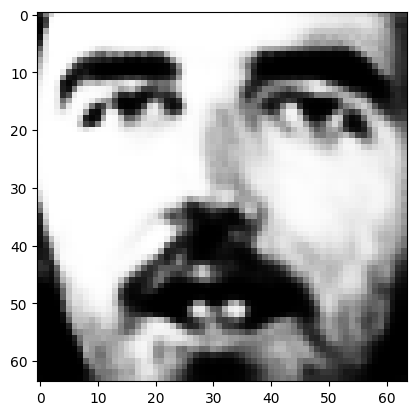

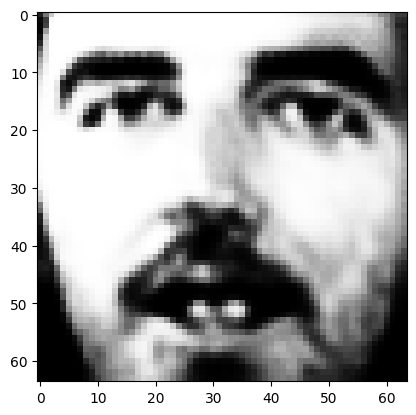

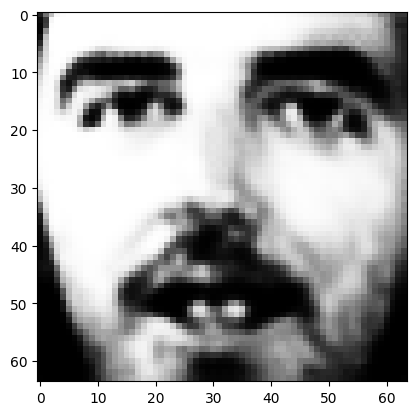

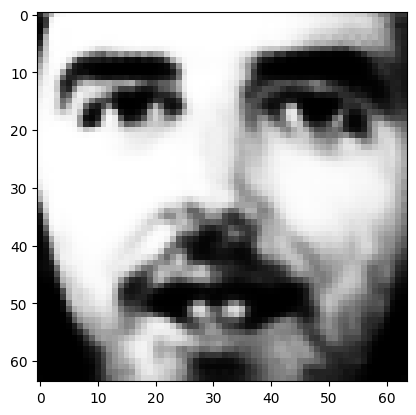

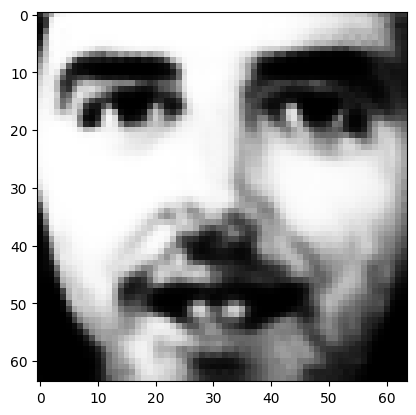

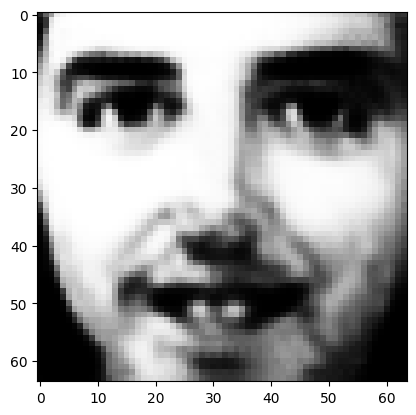

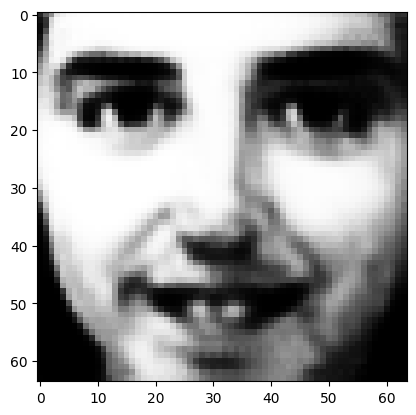

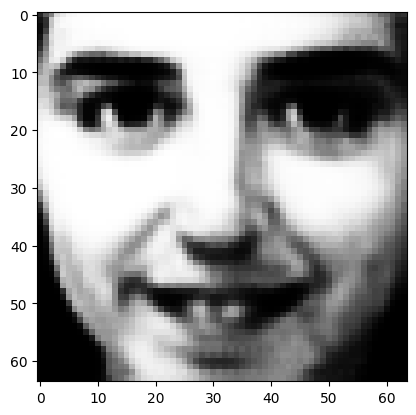

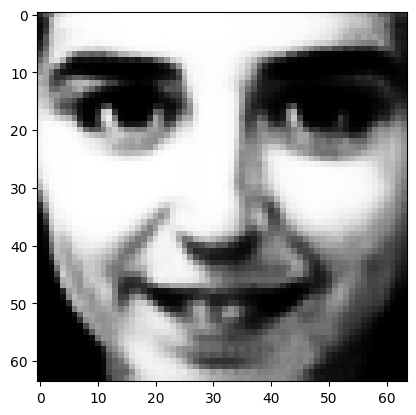

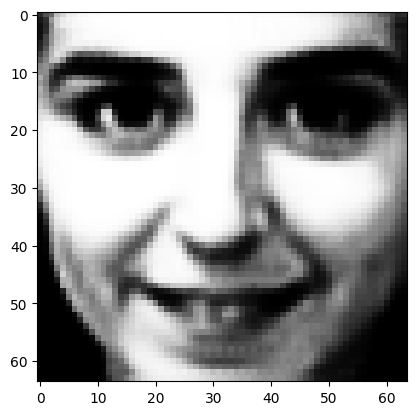

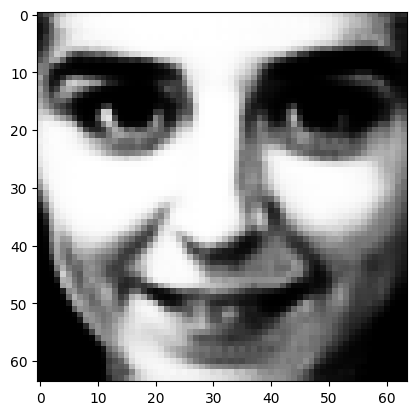

In [12]:
interpolation(90, 101)

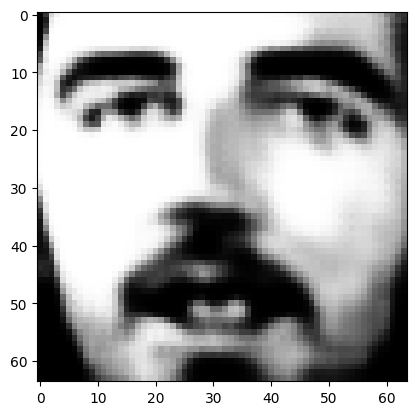

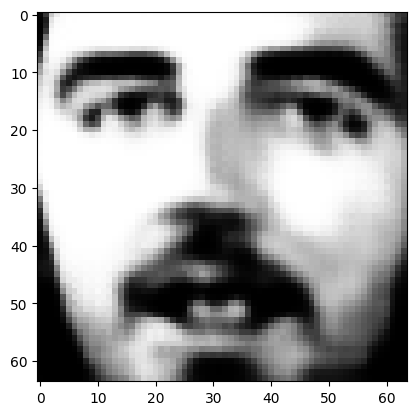

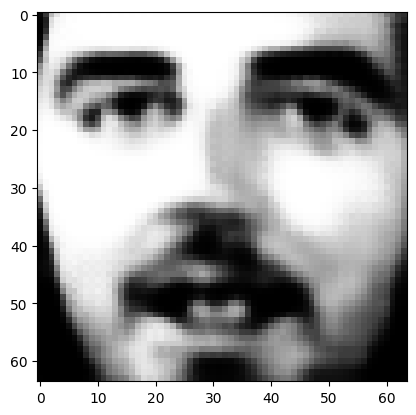

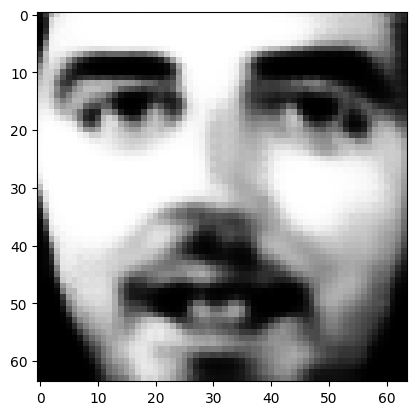

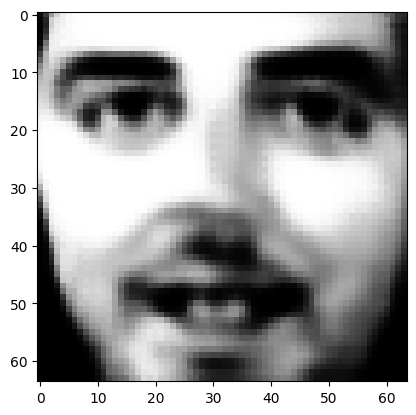

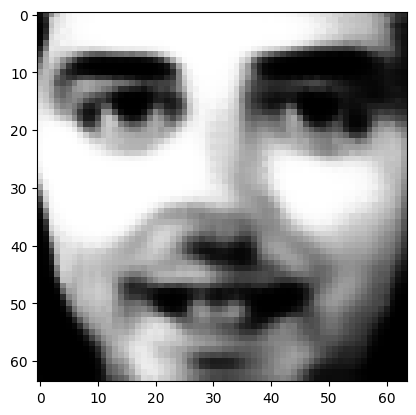

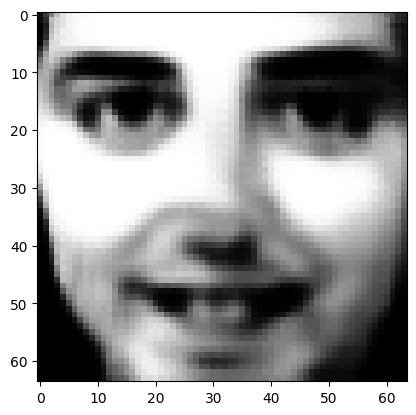

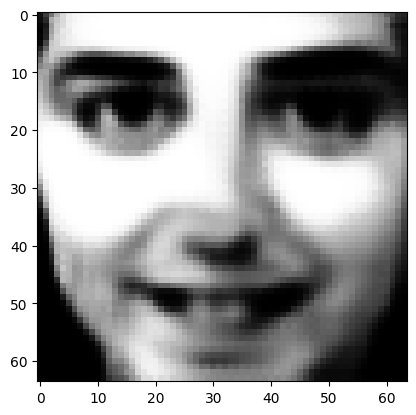

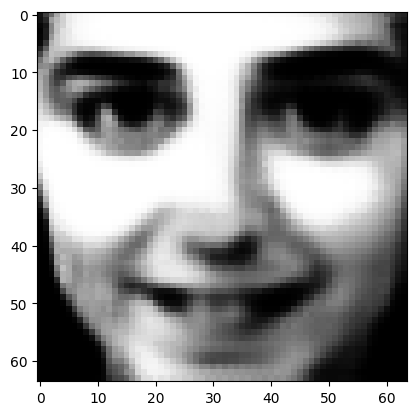

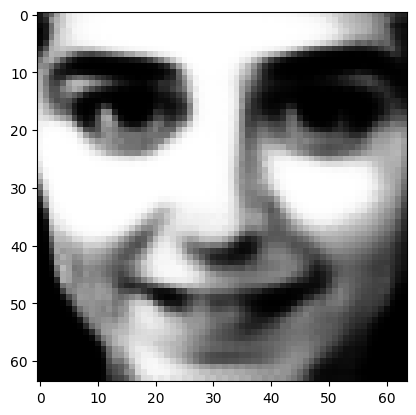

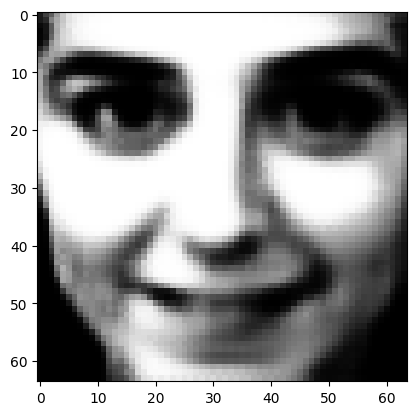

In [33]:
interpolation(90, 101)

In [34]:
cpu = torch.device('cpu')
ddpm.to(cpu)
encoder.to(cpu)
decoder.to(cpu)
torch.save(ddpm.state_dict(), f"./d2c_ddpm.pth")
torch.save(encoder.state_dict(), f"./d2c_encoder.pth")
torch.save(decoder.state_dict(), f"./d2c_decoder.pth")